In [21]:
import pandas as pd
import numpy as np

## **Your first inner join**

You have been tasked with figuring out what the most popular types of fuel used in Chicago taxis are. To complete the analysis, you need to merge the taxi_owners and taxi_veh tables together on the vid column. You can then use the merged table along with the .value_counts() method to find the most common fuel_type.

In [5]:
taxi_owners = pd.read_pickle("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/taxi_owners.p")
taxi_owners.head()

,rid,vid,owner,address,zip
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618


In [6]:
taxi_veh = pd.read_pickle("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/taxi_vehicles.p")
taxi_veh.head()

,vid,make,model,year,fuel_type,owner
0,2767,TOYOTA,CAMRY,2013,HYBRID,SEYED M. BADRI
1,1411,TOYOTA,RAV4,2017,HYBRID,DESZY CORP.
2,6500,NISSAN,SENTRA,2019,GASOLINE,AGAPH CAB CORP
3,2746,TOYOTA,CAMRY,2013,HYBRID,"MIDWEST CAB CO, INC"
4,5922,TOYOTA,CAMRY,2013,HYBRID,SUMETTI CAB CO


In [7]:
# Merge the taxi_owners and taxi_veh tables
taxi_own_veh = taxi_owners.merge(taxi_veh, on ='vid')

# Print the column names of the taxi_own_veh
print(taxi_own_veh.columns)

Index(['rid', 'vid', 'owner_x', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_y'],
      dtype='object')


In [10]:
# Merge the taxi_owners and taxi_veh tables setting a suffix
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes=['_own','_veh'])

# Print the column names of taxi_own_veh
print(taxi_own_veh.columns)

Index(['rid', 'vid', 'owner_own', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_veh'],
      dtype='object')


In [11]:
# Merge the taxi_owners and taxi_veh tables setting a suffix
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes=('_own','_veh'))

# Print the value_counts to find the most popular fuel_type
print(taxi_own_veh['fuel_type'].value_counts())

HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: fuel_type, dtype: int64


## **Inner joins and number of rows returned**
All of the merges you have studied to this point are called inner joins. It is necessary to understand that inner joins only return the rows with matching values in both tables. You will explore this further by reviewing the merge between the wards and census tables, then comparing it to merges of copies of these tables that are slightly altered, named wards_altered, and census_altered. The first row of the wards column has been changed in the altered tables. You will examine how this affects the merge between them. The tables have been loaded for you.

In [15]:
wards = pd.read_pickle("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/ward.p")
wards.head()

,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649


In [13]:
census = pd.read_pickle("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/census.p")
census.head()

,ward,pop_2000,pop_2010,change,address,zip
0,1,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


In [17]:
# Merge the wards and census tables on the ward column
wards_census = wards.merge(census, on = 'ward')

# Print the shape of wards_census
print('wards_census table shape:', wards_census.shape)

wards_census table shape: (50, 9)


In [25]:
wards_altered = wards.copy()
wards_altered['ward'] = np.where(wards_altered['ward']=='1',61,wards_altered['ward'])

census_altered = census.copy()
census_altered['ward'] = np.where(census_altered['ward']=='1',None,census_altered['ward'])

In [28]:
# Print the first few rows of the wards_altered table to view the change 
print(wards_altered[['ward']].head())

# Merge the wards_altered and census tables on the ward column
wards_altered_census = wards_altered.merge(census, on='ward')

# Print the shape of wards_altered_census
print('wards_altered_census table shape:', wards_altered_census.shape)

  ward
0   61
1    2
2    3
3    4
4    5
wards_altered_census table shape: (49, 9)


In [29]:
# Print the first few rows of the census_altered table to view the change 
print(census_altered[['ward']].head())

# Merge the wards and census_altered tables on the ward column
wards_census_altered = wards.merge(census_altered, on ='ward')

# Print the shape of wards_census_altered
print('wards_census_altered table shape:', wards_census_altered.shape)

   ward
0  None
1     2
2     3
3     4
4     5
wards_census_altered table shape: (49, 9)


## **One-to-many merge**
A business may have one or multiple owners. In this exercise, you will continue to gain experience with one-to-many merges by merging a table of business owners, called biz_owners, to the licenses table. Recall from the video lesson, with a one-to-many relationship, a row in the left table may be repeated if it is related to multiple rows in the right table. In this lesson, you will explore this further by finding out what is the most common business owner title. (i.e., secretary, CEO, or vice president)

In [30]:
licenses = pd.read_pickle("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/licenses.p")
licenses.head()

,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613


In [31]:
biz_owners = pd.read_pickle("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/business_owners.p")
biz_owners.head()

,account,first_name,last_name,title
0,10,PEARL,SHERMAN,PRESIDENT
1,10,PEARL,SHERMAN,SECRETARY
2,10002,WALTER,MROZEK,PARTNER
3,10002,CELINA,BYRDAK,PARTNER
4,10005,IRENE,ROSENFELD,PRESIDENT


In [33]:
# Merge the licenses and biz_owners table on account
licenses_owners = licenses.merge(biz_owners, on = 'account')

# Group the results by title then count the number of accounts
counted_df = licenses_owners.groupby('title').agg({'account':'count'})

# Sort the counted_df in desending order
sorted_df = counted_df.sort_values(by='account',ascending=False)

# Use .head() method to print the first few rows of sorted_df
print(sorted_df.head())

                 account
title                   
PRESIDENT           6259
SECRETARY           5205
SOLE PROPRIETOR     1658
OTHER               1200
VICE PRESIDENT       970


## **Total riders in a month**
Your goal is to find the total number of rides provided to passengers passing through the Wilson station (station_name == 'Wilson') when riding Chicago's public transportation system on weekdays (day_type == 'Weekday') in July (month == 7). Luckily, Chicago provides this detailed data, but it is in three different tables. You will work on merging these tables together to answer the question. This data is different from the business related data you have seen so far, but all the information you need to answer the question is provided.


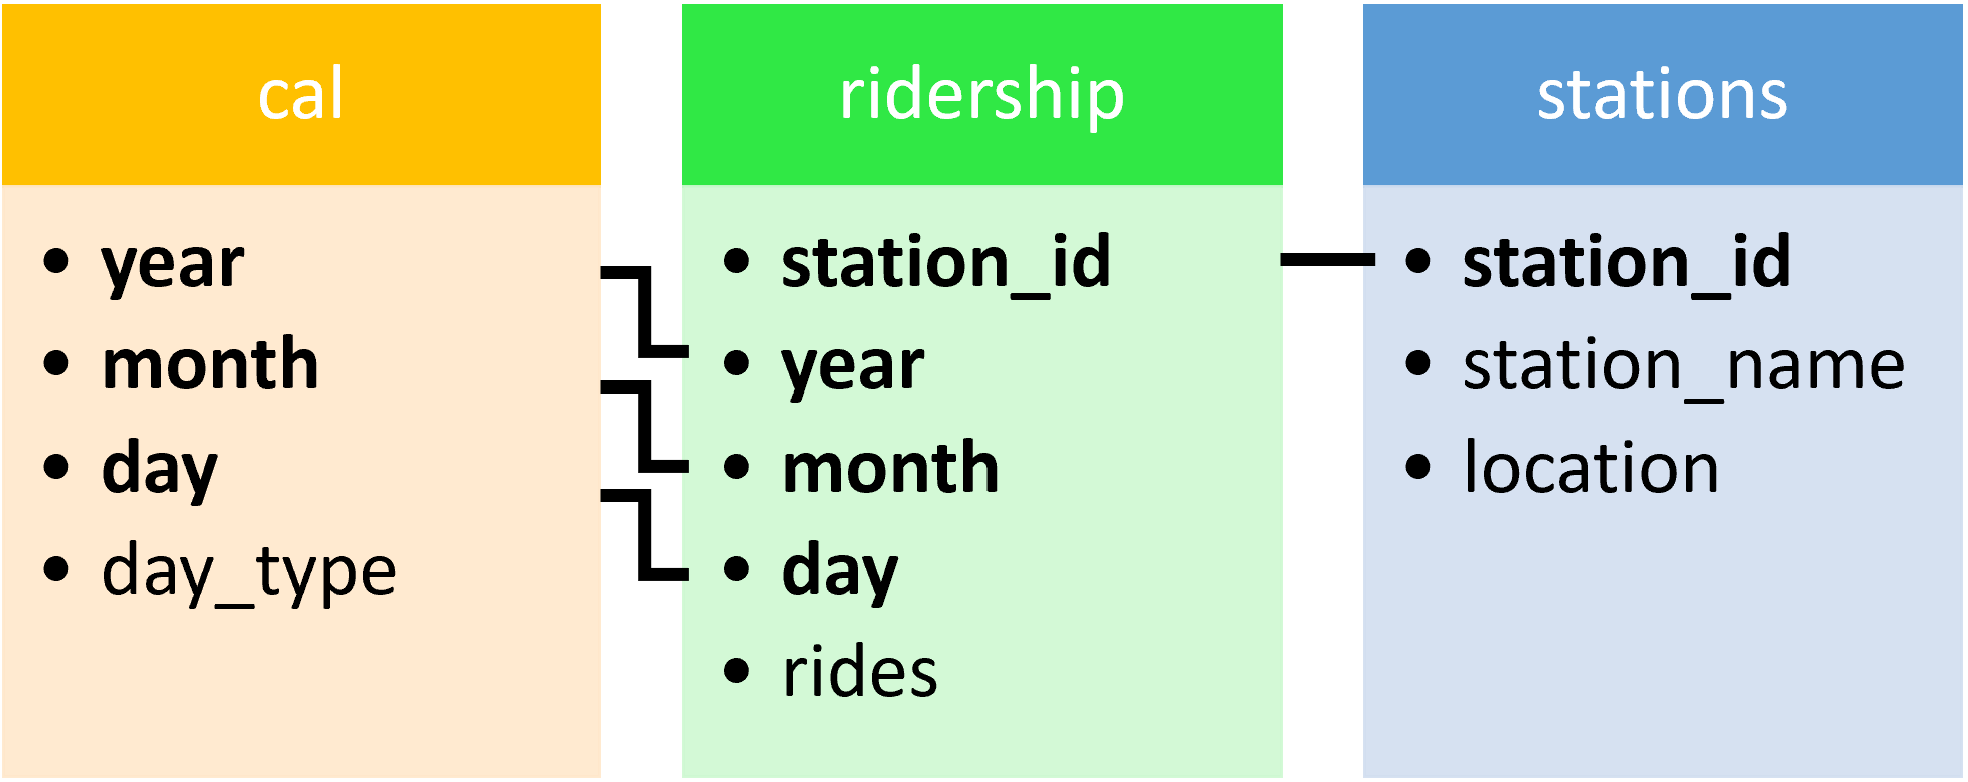

In [34]:
cal = pd.read_pickle("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/cta_calendar.p")
cal.head()

,year,month,day,day_type
0,2019,1,1,Sunday/Holiday
1,2019,1,2,Weekday
2,2019,1,3,Weekday
3,2019,1,4,Weekday
4,2019,1,5,Saturday


In [35]:
ridership = pd.read_pickle("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/cta_ridership.p")
ridership.head()

,station_id,year,month,day,rides
0,40010,2019,1,1,576
1,40010,2019,1,2,1457
2,40010,2019,1,3,1543
3,40010,2019,1,4,1621
4,40010,2019,1,5,719


In [36]:
stations = pd.read_pickle("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/stations.p")
stations.head()

,station_id,station_name,location
0,40010,Austin-Forest Park,"(41.870851, -87.776812)"
1,40020,Harlem-Lake,"(41.886848, -87.803176)"
2,40030,Pulaski-Lake,"(41.885412, -87.725404)"
3,40040,Quincy/Wells,"(41.878723, -87.63374)"
4,40050,Davis,"(42.04771, -87.683543)"


In [37]:
# Merge the ridership and cal tables
ridership_cal = ridership.merge(cal, on =['year','month','day'])
ridership_cal.head()

,station_id,year,month,day,rides,day_type
0,40010,2019,1,1,576,Sunday/Holiday
1,40080,2019,1,1,1839,Sunday/Holiday
2,40770,2019,1,1,2724,Sunday/Holiday
3,40120,2019,1,1,754,Sunday/Holiday
4,40540,2019,1,1,2175,Sunday/Holiday


In [38]:
# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
            				.merge(stations, on = ['station_id'])
                
ridership_cal_stations.head()

,station_id,year,month,day,rides,day_type,station_name,location
0,40010,2019,1,1,576,Sunday/Holiday,Austin-Forest Park,"(41.870851, -87.776812)"
1,40010,2019,1,2,1457,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
2,40010,2019,1,3,1543,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
3,40010,2019,1,4,1621,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
4,40010,2019,1,5,719,Saturday,Austin-Forest Park,"(41.870851, -87.776812)"


In [39]:
# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
							.merge(stations, on='station_id')

# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7) 
                   & (ridership_cal_stations['day_type'] == 'Weekday') 
                   & (ridership_cal_stations['station_name'] == 'Wilson'))

# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())

140005


## **Three table merge**
To solidify the concept of a three DataFrame merge, practice another exercise. A reasonable extension of our review of Chicago business data would include looking at demographics information about the neighborhoods where the businesses are. A table with the median income by zip code has been provided to you. You will merge the licenses and wards tables with this new income-by-zip-code table called zip_demo.

In [40]:
zip_demo = pd.read_pickle("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/zip_demo.p")
zip_demo.head()

,zip,income
0,60630,70122
1,60640,50488
2,60622,87143
3,60614,100116
4,60608,41226


In [42]:
wards.head()

,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649


In [45]:
# Merge licenses and zip_demo, on zip; and merge the wards on ward
licenses_zip_ward = licenses.merge(zip_demo, on = 'zip')\
        .merge(wards, on ='ward')

# Print the results by alderman and show median income
print(licenses_zip_ward.groupby("alderman").agg({'income':'median'}))

                             income
alderman                           
Ameya Pawar                 66246.0
Anthony A. Beale            38206.0
Anthony V. Napolitano       82226.0
Ariel E. Reyboras           41307.0
Brendan Reilly             110215.0
Brian Hopkins               87143.0
Carlos Ramirez-Rosa         66246.0
Carrie M. Austin            38206.0
Chris Taliaferro            55566.0
Daniel "Danny" Solis        41226.0
David H. Moore              33304.0
Deborah Mell                66246.0
Debra L. Silverstein        50554.0
Derrick G. Curtis           65770.0
Edward M. Burke             42335.0
Emma M. Mitts               36283.0
George Cardenas             33959.0
Gilbert Villegas            41307.0
Gregory I. Mitchell         24941.0
Harry Osterman              45442.0
Howard B. Brookins, Jr.     33304.0
James Cappleman             79565.0
Jason C. Ervin              41226.0
Joe Moore                   39163.0
John S. Arena               70122.0
Leslie A. Hairston          

## **One-to-many merge with multiple tables**
In this exercise, assume that you are looking to start a business in the city of Chicago. Your perfect idea is to start a company that uses goats to mow the lawn for other businesses. However, you have to choose a location in the city to put your goat farm. You need a location with a great deal of space and relatively few businesses and people around to avoid complaints about the smell. You will need to merge three tables to help you choose your location. The land_use table has info on the percentage of vacant land by city ward. The census table has population by ward, and the licenses table lists businesses by ward.

In [47]:
land_use = pd.read_pickle("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/land_use.p")
land_use.head()

,ward,residential,commercial,industrial,vacant,other
0,1,41,9,2,2,46
1,2,31,11,6,2,50
2,3,20,5,3,13,59
3,4,22,13,0,7,58
4,5,25,3,1,3,68


In [ ]:
pd.merge()

In [53]:
# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on = 'ward') \
        .merge(licenses, on = 'ward', suffixes=['_cen','_lic'])

# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward','pop_2010','vacant'], 
                                   as_index=False).agg({'account':'count'})


"""
Sort pop_vac_lic by vacant, account, andpop_2010 in descending, ascending, and ascending order respectively. Save it as sorted_pop_vac_lic.

"""
sorted_pop_vac_lic = pop_vac_lic.sort_values(by=['vacant','account','pop_2010'], 
                                             ascending=[False,True,True])

# Print the top few rows of sorted_pop_vac_lic
print(sorted_pop_vac_lic.head())

   ward  pop_2010  vacant  account
47    7     51581      19       80
12   20     52372      15      123
1    10     51535      14      130
16   24     54909      13       98
7    16     51954      13      156
